<a href="https://colab.research.google.com/github/hibahassan1/Face-Recognition-using-CNN/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Image Preprocessing for Testing and Training data**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Specifying the paths of the training and testing datasets
TRAIN_DIR = '/content/drive/MyDrive/Face-Images/Face Images/Final Training Images'
TEST_DIR = '/content/drive/MyDrive/Face-Images/Face Images/Final Training Images'

# Data augmentation for the training data
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        rescale=1./255)

# No data augmentation for the testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating the training data
train_set = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(64, 64),
        batch_size=26,
        class_mode='categorical')

# Generating the testing data
test_set = test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(64, 64),
        batch_size=26,
        class_mode='categorical')

# Printing class labels for each face
print(train_set.class_indices)



Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.
{'face1': 0, 'face10': 1, 'face11': 2, 'face12': 3, 'face13': 4, 'face14': 5, 'face15': 6, 'face16': 7, 'face2': 8, 'face3': 9, 'face4': 10, 'face5': 11, 'face6': 12, 'face7': 13, 'face8': 14, 'face9': 15}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Creating lookup table for all faces**

In [ ]:
# Get the class indices and store the face names and their corresponding numeric tags in a dictionary
result_map = {v: k for k, v in train_set.class_indices.items()}

# Save the result map for future reference using pickle
import pickle
with open("ResultsMap.pkl", 'wb') as file_write_stream:
    pickle.dump(result_map, file_write_stream)

# Print the result map
print("Mapping of Face and its ID:", result_map)

# Get the number of faces and set the number of output neurons accordingly
output_neurons = len(result_map)
print("The number of output neurons:", output_neurons)


Mapping of Face and its ID: {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}
The number of output neurons: 16


## **Creating a CNN deep learning model**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the CNN
classifier = Sequential()

# Add convolutional layers with ReLU activation and max pooling layers
classifier.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
classifier.add(Flatten())

# Add fully connected layers with ReLU activation
classifier.add(Dense(64, activation='relu'))

# Add output layer with softmax activation for multiclass classification
classifier.add(Dense(output_neurons, activation='softmax'))

# Compile the CNN with categorical cross-entropy loss and Adam optimizer
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

import time

# Measure the time taken by the model to train
start_time = time.time()

# Train the model using the data generator and the number of steps per epoch and validation steps
history = classifier.fit(train_set,
                         steps_per_epoch=len(train_set),
                         epochs=20,
                         validation_data=test_set,
                         validation_steps=len(test_set))

end_time = time.time()
print(" ")
print("Total Time Taken:", round((end_time-start_time)/60), 'Minutes')


Epoch 1/20
10/10 [==============================] - 123s 12s/step - loss: 2.8040 - accuracy: 0.0656 - val_loss: 2.7518 - val_accuracy: 0.1189
Epoch 2/20
10/10 [==============================] - 5s 522ms/step - loss: 2.7563 - accuracy: 0.0943 - val_loss: 2.7098 - val_accuracy: 0.2131
Epoch 3/20
10/10 [==============================] - 5s 565ms/step - loss: 2.6860 - accuracy: 0.1721 - val_loss: 2.5922 - val_accuracy: 0.2131
Epoch 4/20
10/10 [==============================] - 6s 620ms/step - loss: 2.5741 - accuracy: 0.2008 - val_loss: 2.3990 - val_accuracy: 0.2623
Epoch 5/20
10/10 [==============================] - 6s 614ms/step - loss: 2.2971 - accuracy: 0.2869 - val_loss: 2.0506 - val_accuracy: 0.2582
Epoch 6/20
10/10 [==============================] - 5s 527ms/step - loss: 2.0197 - accuracy: 0.3566 - val_loss: 1.6979 - val_accuracy: 0.4262
Epoch 7/20
10/10 [==============================] - 6s 606ms/step - loss: 1.6852 - accuracy: 0.4754 - val_loss: 1.2878 - val_accuracy: 0.5533
Epoch 

## **Testing CNN on unseen images**

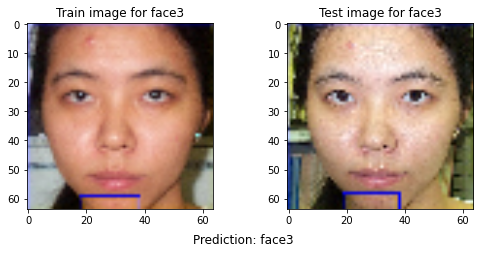

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the test image
test_image_path = '/content/drive/MyDrive/Face-Images/Face Images/Final Testing Images/face3/1face3.jpg'
target_size = (64, 64)
test_image = image.img_to_array(image.load_img(test_image_path, target_size=target_size))
test_image = np.expand_dims(test_image, axis=0)

# Predict the test image
result = classifier.predict(test_image, verbose=0)
prediction = result_map[np.argmax(result)]

# Load the train image for the predicted label
train_image_path = os.path.join(TRAIN_DIR, prediction, os.listdir(os.path.join(TRAIN_DIR, prediction))[0])
train_image = image.img_to_array(image.load_img(train_image_path, target_size=target_size))
train_image = np.squeeze(train_image)


# Display the images and the prediction
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.subplots_adjust(wspace=0.4)

# Show the images
axs[0].imshow(train_image.astype('uint8'), interpolation='bilinear')
axs[0].set_title(f'Train image for {prediction}', fontsize=12)
axs[1].imshow(test_image[0].astype('uint8'), interpolation='bilinear')
axs[1].set_title(f'Test image for {prediction}', fontsize=12)

# Add the prediction text between the images
spacing = 20  # adjust as needed


fig.text(0.5, 0.07, f'Prediction: {prediction}',
         fontsize=12, ha='center', va='center')

plt.show()




